In [7]:
import pandas as pd
import numpy as np

In [8]:
tesla_df = pd.read_csv("tsla_2014_2023.csv")

***Analysis***

In [9]:
tesla_df.sample(5)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
922,2017-08-30,23.311333,23.564667,23.133333,23.545334,51193500,56.137783,53.637707,67.426266,-5.175082,23.021666,22.937414,22.395660,21.952893,0.106402,23.562566,0.431334,0.618272,0.679604,23.726667
2371,2023-06-05,217.800003,221.289993,214.520004,217.610001,151143100,89.792164,77.762278,119.522302,143.732390,180.737199,182.961501,180.007400,183.890451,10.046979,184.633499,7.319992,8.660763,8.128381,221.309998
1880,2021-06-22,206.083328,209.523331,205.166672,207.903336,57476700,60.778817,52.383038,80.284607,118.179731,214.624268,210.851424,226.543134,213.959602,-0.973544,203.578001,4.356659,6.277097,7.293855,218.856674
1033,2018-02-08,22.887333,23.241333,20.973333,21.015333,154719000,29.718313,38.453343,-120.971406,-183.137658,22.028453,22.287361,22.165300,22.165187,0.052857,22.855667,2.268000,0.950462,0.804733,20.694668
868,2017-06-14,25.406000,25.616667,25.087334,25.377333,192276000,79.635783,74.238630,136.211067,134.870311,21.384533,21.428316,19.367367,19.686299,1.097231,22.518300,0.553333,0.825578,0.739728,25.022667


In [10]:
tesla_df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

In [11]:
tesla_df.duplicated().sum()

0

In [12]:
tesla_df.shape

(2516, 20)

In [13]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

Result:
It contain no null values.
It contain no duplicate values.
its shape is (2156,20)

#***Exploratory Data Analysis***

In [14]:
#CONVERSION OF DATATYPE 
tesla_df['date'] = pd.to_datetime(tesla_df['date'])

In [15]:
tesla_df['year'] = tesla_df['date'].dt.year

In [16]:
tesla_df['daily_return'] = tesla_df['next_day_close'] - tesla_df['close']

In [17]:
tesla_df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year,daily_return
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,...,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667,2014,-0.036000
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,...,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000,2014,-0.170667
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,...,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2014,0.157333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,...,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,2014,0.128000
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,...,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333,2014,-0.250000


In [18]:
#maximum return
tesla_df['daily_return'].max()

47.66665599999999

In [19]:
#minimum return
tesla_df['daily_return'].min()

-46.48001099999999

In [22]:
tesla_df.groupby('year')['daily_return'].sum()

year
2014      4.614000
2015      0.273333
2016     -0.428000
2017      6.902668
2018     -0.694001
2019      8.009333
2020    214.572668
2021    156.669998
2022   -291.826668
2023    140.320000
Name: daily_return, dtype: float64

In [31]:
#setting year as index
tesla_df.set_index('date',inplace=True)

In [32]:
tesla_df.sample()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,daily_return
date,,,,,,,,,,,,,,,,,,,,
2023-06-26,250.070007,258.369995,240.699997,241.050003,179990600,43.50129,56.577273,-151.893659,-17.338699,197.5248,212.432057,195.0366,200.276112,18.473643,237.022,17.669998,13.15627,11.34371,250.210007,9.160004


# Visualization: Analysis Output

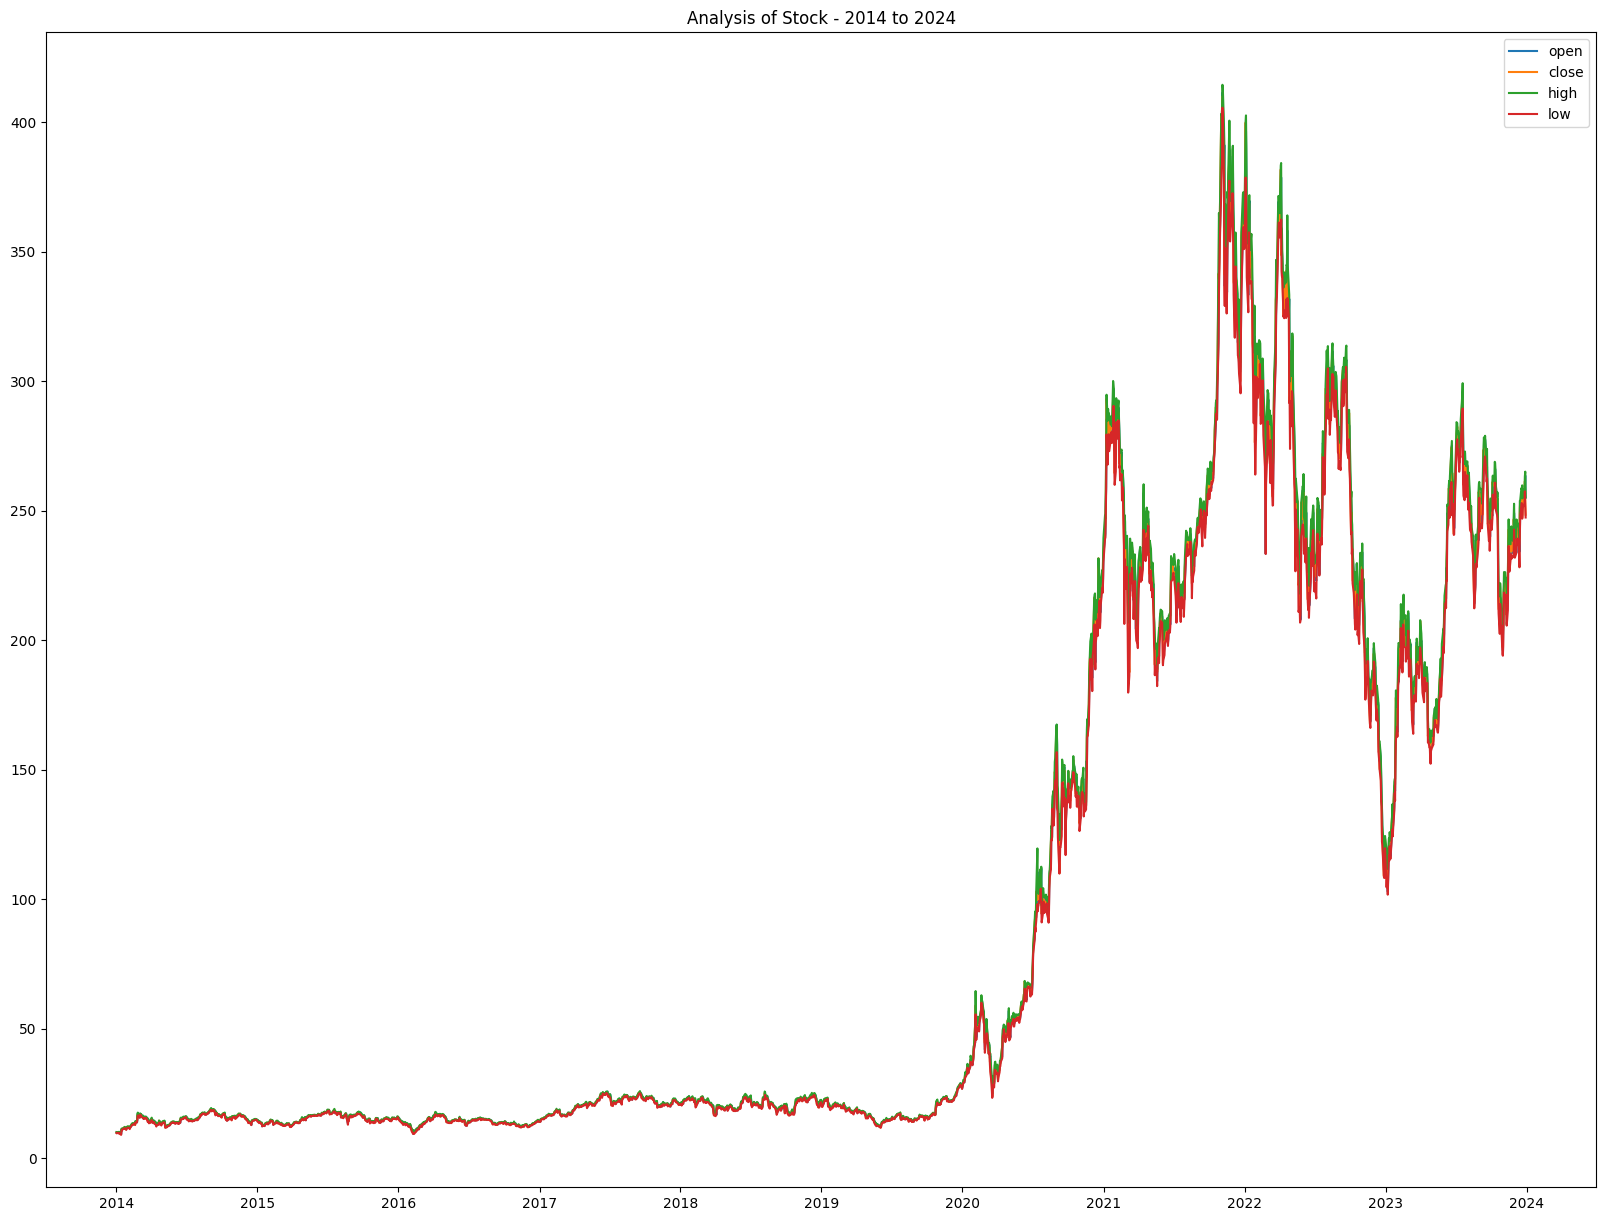

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(tesla_df.index,tesla_df['open'],label="open")
plt.plot(tesla_df.index ,tesla_df['close'],label="close")
plt.plot(tesla_df.index ,tesla_df['high'],label="high")
plt.plot(tesla_df.index ,tesla_df['low'],label="low")
plt.title(f"Analysis of Stock - 2014 to 2024")
plt.legend()

<Axes: xlabel='date', ylabel='Volume'>

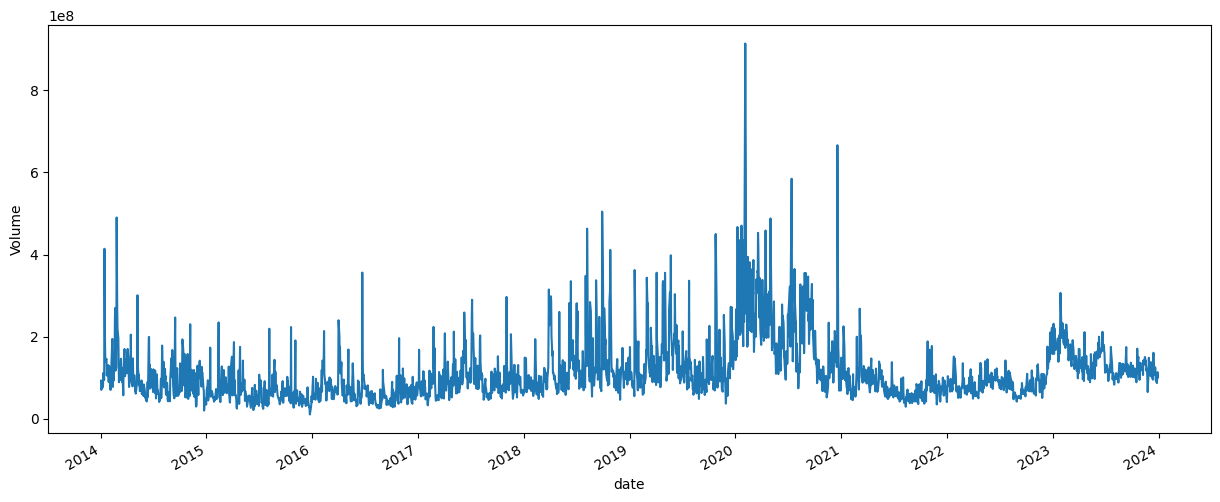

In [35]:
plt.figure(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel("Volume")
tesla_df['volume'].plot()


<Axes: >

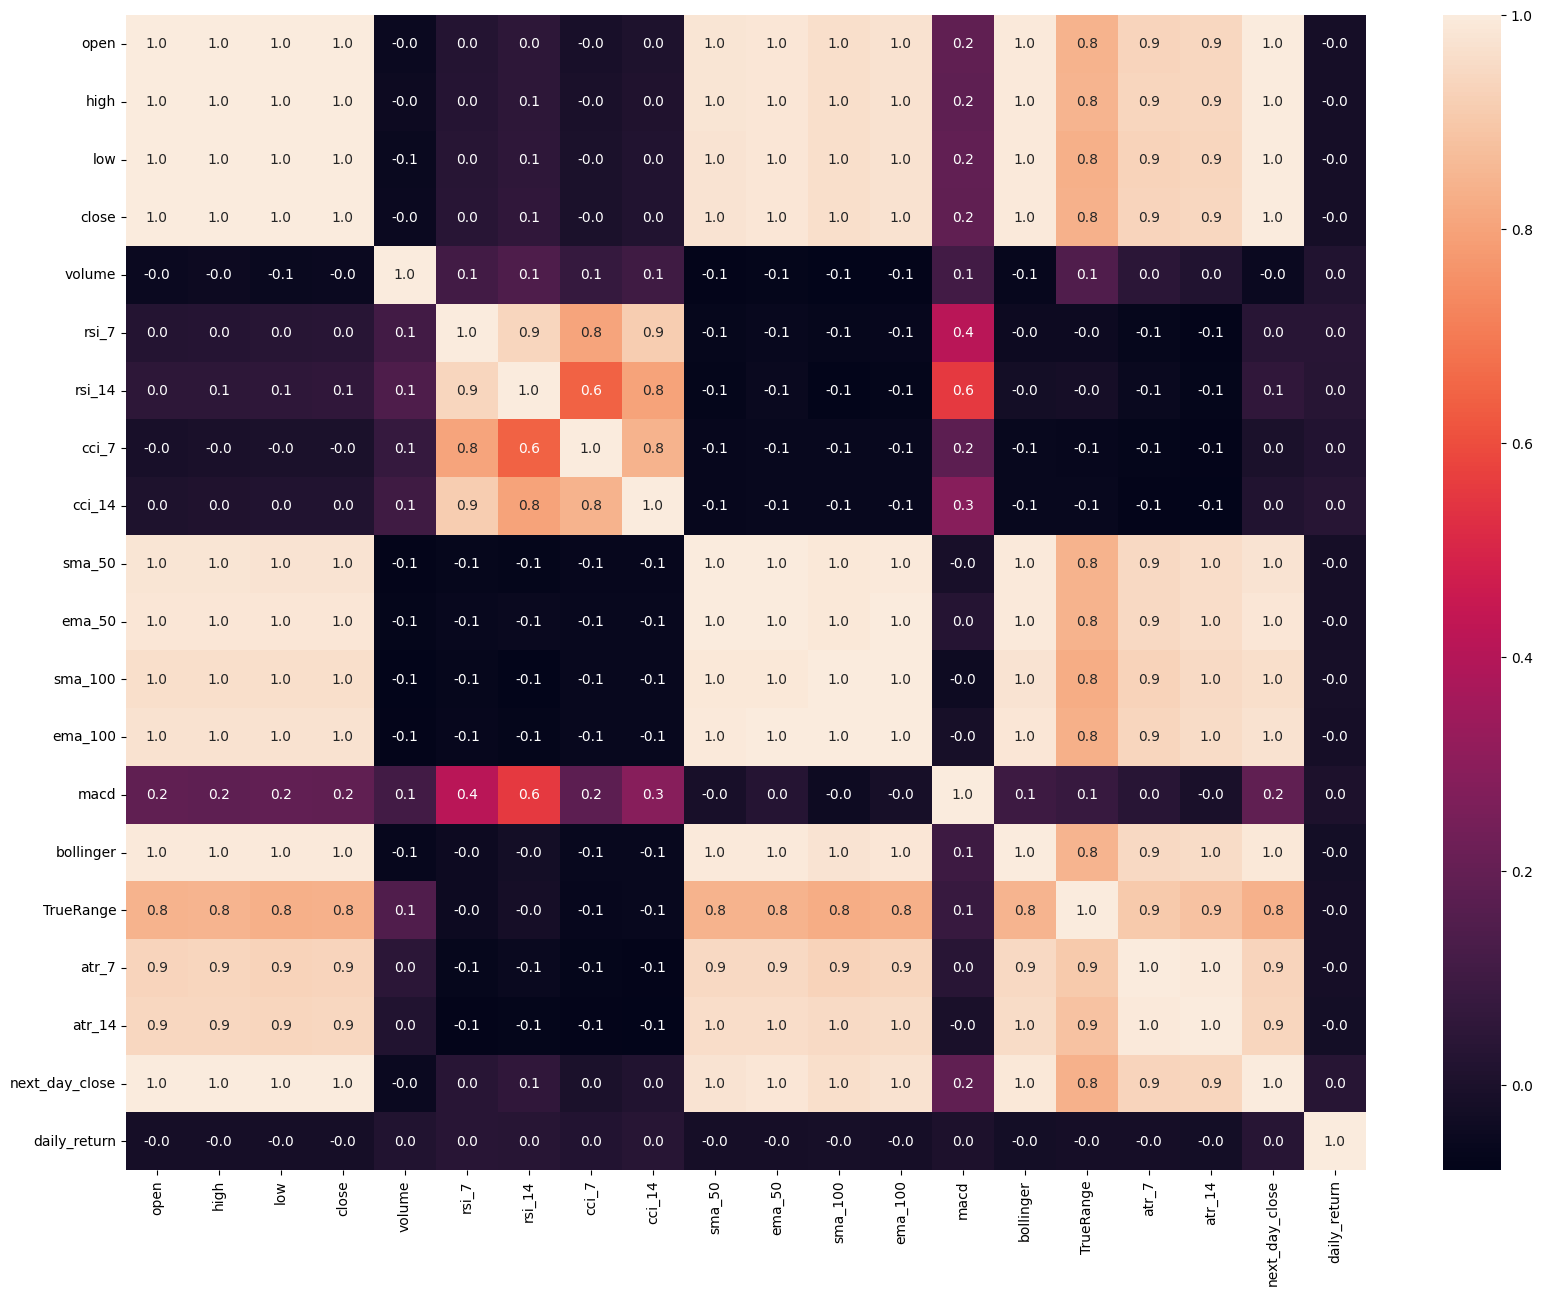

In [40]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(tesla_df.corr(),annot=True,fmt=".1f")